# Test 7: t-test for a population mean (variance unknown)

## Objective

- To investigate the significance of the difference between an assumed population mean $\mu$ and a sample mean  $\bar{x}$

## Assumptions

- We don't need to know population variance $\sigma^2$! If we do, use Test 1: Z-test
- The population MUST be normally distributed!
    - Else the test is approximate

## Method

- Let's suppose we have a population of unknown variance, and an assumed mean of $\mu$
- A random sample of size $n$ is taken
- Using this, we compute the sample mean $\bar{x}$
- We also compute the sample standard deviation $s$:
$$\begin{aligned}
    s &= \sqrt{
        \frac{\sum_{1}^{n} (x_i - \bar{x})^2}{n-1}
    }
\end{aligned}$$

- The test statistic $t$ is

$$\begin{aligned}
    t &= \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
\end{aligned}$$

- $t$ follows a student's t-distribution with $n-1$ degrees of freedom

## Example

- Problem
    - A sample of nine plastic nuts yielded an average diameter $\bar{x}$ of 3.1 cm with estimated standard deviation $s$ of 1.0 cm. 
    - It is assumed from design and manufacturing requirements that the population mean of nuts $\mu = 4$. 
    - What does this say about the mean diameter of plastic nuts being produced? 
    
- Question
    - Two-tailed test: Is the sample mean the same as the population mean?
    - One-tailed test: Is the sample mean bigger/smaller than the population mean?

In [1]:
mu = 4
n = 9
xbar = 3.1
s = 1
degrees_of_freedom=n-1

def compute_test_statistic(xbar, mu, s, n):
    return (xbar - mu) / (s/n**0.5)

## Compare against student's t-distribution
print(degrees_of_freedom)
compute_test_statistic(xbar, mu, s, n) 


8


-2.6999999999999997

## Proof by simulation that test statistic is t-distribution

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

POPULATION_MEAN = 5
UNKNOWN_POPULATION_SIGMA = 2
SAMPLE_SIZE = 100

def compute_sample_mean_and_variance():
    sample = np.random.normal(POPULATION_MEAN, UNKNOWN_POPULATION_SIGMA, size=SAMPLE_SIZE)
    
    sample_mean = np.mean(sample)
    sample_sigma = (np.sum((sample - sample_mean)**2)/(SAMPLE_SIZE-1))**0.5

    return sample_mean, sample_sigma

tuples = [compute_sample_mean_and_variance() for _ in range(10_000)]
sample_means = np.array([x[0] for x in tuples])
sample_sigmas = np.array([x[1] for x in tuples])

0.005243457769219668
1.0033947247998867


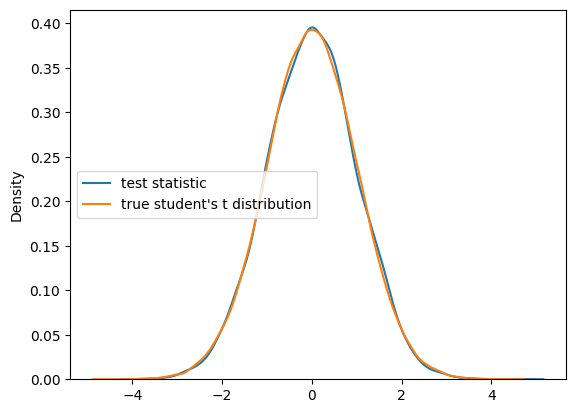

In [9]:
test_statistic_distribution = (
    (sample_means - POPULATION_MEAN) / (sample_sigmas / (SAMPLE_SIZE**0.5))
)
degrees_of_freedom = SAMPLE_SIZE-1
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()
# test_statistic_distribution